In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# **Inspection:** 

In [42]:
df = pd.read_csv('data/airline_passenger_satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.shape

(103904, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# **Cleaning:** 

In [9]:
# Lowercasing and underscoring all column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['unnamed:_0', 'id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

#### Inspecting 310 missing values in Arrival delay

In [11]:
# Inspecting the correlation between arrival and departure delays
df[['departure_delay_in_minutes', 'arrival_delay_in_minutes']].corr()

,departure_delay_in_minutes,arrival_delay_in_minutes
departure_delay_in_minutes,1.000000,0.965481
arrival_delay_in_minutes,0.965481,1.000000


In [12]:
# Calculate the median ratio of arrival to departure delays (excluding missing values)
delay_ratio = (
    df['arrival_delay_in_minutes'] / df['departure_delay_in_minutes']
).median()
# Impute missing arrival delays using the ratio
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(
    df['departure_delay_in_minutes'] * delay_ratio
)

In [13]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

# **EDA:**

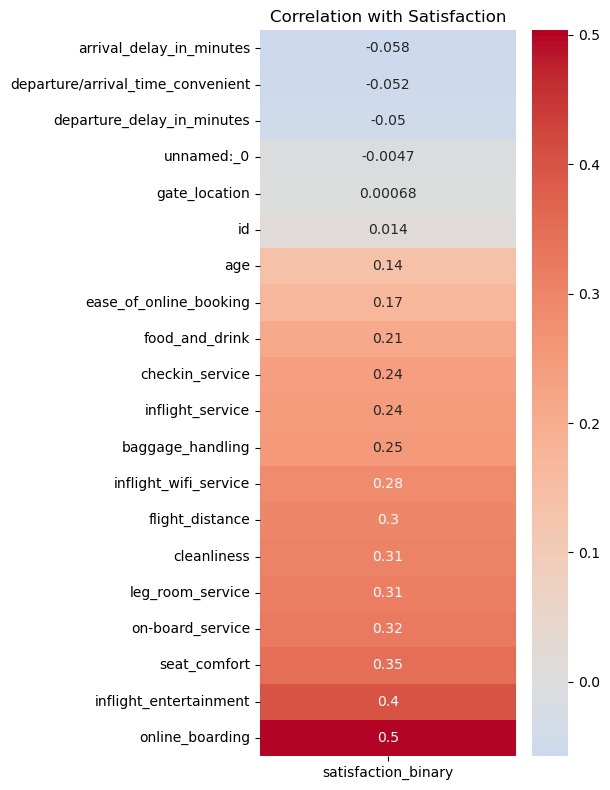

In [15]:
# Encode satisfaction to binary
df['satisfaction_binary'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Compute correlation of all numeric columns with the binary target
corr_with_target = df.corr(numeric_only=True)['satisfaction_binary'].drop('satisfaction_binary').sort_values()

# Plot a vertical one-column heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=True)

plt.title("Correlation with Satisfaction")
plt.tight_layout()
plt.show()

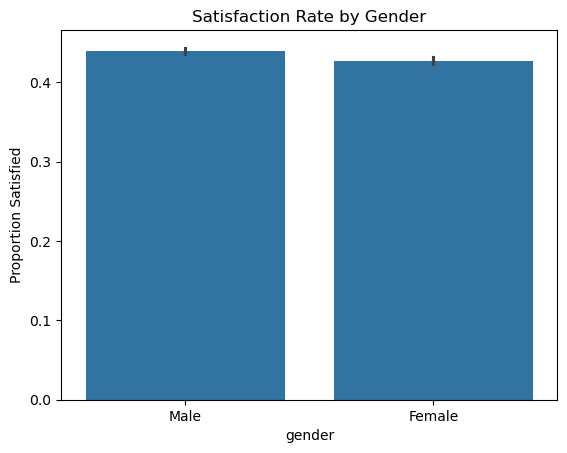

In [16]:
sns.barplot(x='gender', y='satisfaction_binary', data=df)
plt.title("Satisfaction Rate by Gender")
plt.ylabel("Proportion Satisfied")
plt.show()

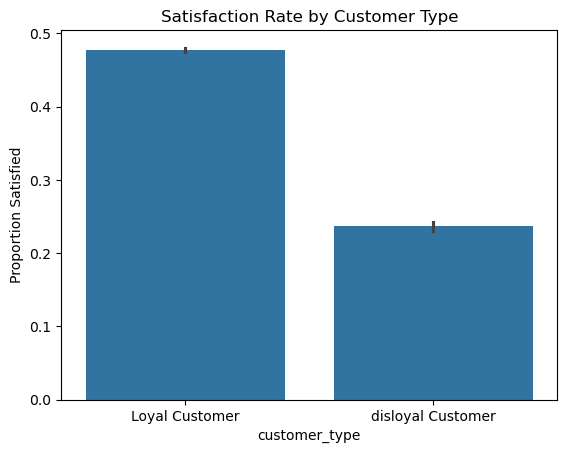

In [17]:
sns.barplot(x='customer_type', y='satisfaction_binary', data=df)
plt.title("Satisfaction Rate by Customer Type")
plt.ylabel("Proportion Satisfied")
plt.show()


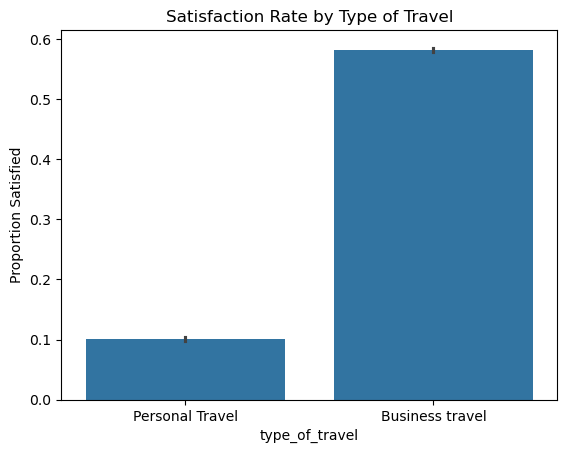

In [18]:
sns.barplot(x='type_of_travel', y='satisfaction_binary', data=df)
plt.title("Satisfaction Rate by Type of Travel")
plt.ylabel("Proportion Satisfied")
plt.show()


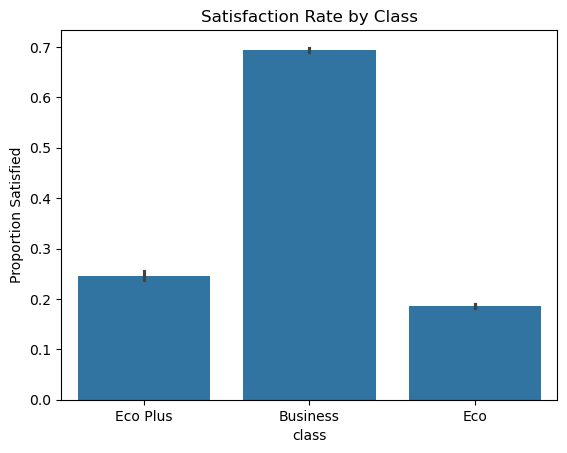

In [19]:
sns.barplot(x='class', y='satisfaction_binary', data=df)
plt.title("Satisfaction Rate by Class")
plt.ylabel("Proportion Satisfied")
plt.show()


In [20]:
# Creating new binary columns
df['is_business_class'] = (df['class'] == 'Business').astype(int)
df['is_business_travel'] = (df['type_of_travel'] == 'Business travel').astype(int)
df['is_loyal_customer'] = (df['customer_type'] == 'Loyal Customer').astype(int)

In [21]:
df.drop(['class', 'type_of_travel', 'customer_type'], axis=1, inplace=True)

In [22]:
df.select_dtypes(include='object').nunique()

gender          2
satisfaction    2
dtype: int64

In [23]:
# Encoding remaining categorical columns to numeric
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [24]:
df.drop('satisfaction', axis=1, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   gender                             103904 non-null  int64  
 3   age                                103904 non-null  int64  
 4   flight_distance                    103904 non-null  int64  
 5   inflight_wifi_service              103904 non-null  int64  
 6   departure/arrival_time_convenient  103904 non-null  int64  
 7   ease_of_online_booking             103904 non-null  int64  
 8   gate_location                      103904 non-null  int64  
 9   food_and_drink                     103904 non-null  int64  
 10  online_boarding                    103904 non-null  int64  
 11  seat_comfort                       1039

In [26]:
df.to_csv("airline_model_data.csv", index=False)